In [6]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Cargamos InceptionV3
#base_model = InceptionV3(weights = 'imagenet',       # Pre-entrenado con ImageNet
#                         include_top = False,        # Sin incluir su capa de clasificacion con 1000 clases para poder hacer fine-tuning 
#                         input_shape = (299, 299, 3) # Necesario cuando no incluimos la ultima capa
#                        )

model = InceptionV3(weights='imagenet')

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


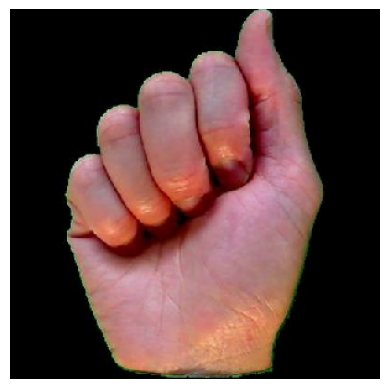

Top 5 Predictions:
1: walking_stick (11.27%)
2: pick (8.86%)
3: ringneck_snake (4.70%)
4: Band_Aid (4.21%)
5: tick (3.43%)


In [20]:
img_path = 'asl_dataset/a/hand1_a_bot_seg_5_cropped.jpeg'  
img = image.load_img(img_path, target_size=(299, 299)) # La carga en img y le hace resize a 299x299
img_array = image.img_to_array(img)                    # La convierte a array de NumPy con dimensiones (299, 299, 3)
img_array = np.expand_dims(img_array, axis=0)          # Agrega una dimension mas al array, haciendolo (1, 299, 299, 3) para batching
img_array = preprocess_input(img_array)                # Matchea la representacion de la imagen a como la espera ImageNet (ej. mappea 0-255 a -1,1, cambia de RGB a BGR)

# Predict
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Display results
plt.imshow(img)
plt.axis('off')
plt.show()

print("Top 5 Predictions:")
for i, (_, label, prob) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({prob * 100:.2f}%)")